## Exercise 1:

### Design an application that is able to detect repetitive subsequences (patterns) between 3 and 8 letters. 
#### Use a chromosome from homosapiens (ex. chromosome 14).
#### Your application must be able to show a list with the most frequent repetitions and provide a bar chart with their relative frequencies.
#### The console must show the positions of these repetitive regions accross chromosome 14, the length of these repetitions should be of at least 20 repetitions in sequence (ex. ATG ATG ATG ... ATG {20 min})

In [5]:
from typing import Counter
import matplotlib.pyplot as plt
import random

### One may use `get_test_sequence()` if problems are encountered during the download of chromosome 14.

In [22]:
def get_test_sequence():
    # base sequence with known repetitive patterns
    base_patterns = [
        "ATGC" * 30,          
        "CGTA" * 25,          
        "TATA" * 40,          
        "GCGC" * 35,         
        "AAAT" * 28,          
        "TGCA" * 32,          
        "GGCC" * 22,          
        "CAAT" * 45,          
    ]
    
    # longer random sections to space out the patterns
    nucleotides = ['A', 'T', 'G', 'C']
    random_sections = [
        ''.join(random.choices(nucleotides, k=500)) for _ in range(10)
    ]
    
    # patterns and random sections
    sequence = ''
    for i in range(len(base_patterns)):
        sequence += random_sections[i]
        sequence += base_patterns[i]
        # Add some small random spacers between patterns
        sequence += ''.join(random.choices(nucleotides, k=20))
    
    # random sequence at the end
    sequence += random_sections[-1]
    
    # specific challenging patterns
    sequence += "AAA" * 50    
    sequence += "ATATATATATATATATATAT" * 30  
    sequence += "GGGGGGGGGGGGGGGGGGGGG" * 25 
    sequence += "CCCCCCCCCCCCCCCCCCCC" * 25 
    sequence += "AGTCAGTCAGTCAGTCAGTC" * 40  
    
    return sequence


In [19]:
def find_repeating_patterns(sequence, min_length=3, max_length=8):
    """Find all repeating patterns of specified lengths in the sequence"""
    patterns = {}
    for length in range(min_length, max_length + 1):
        for i in range(len(sequence) - length + 1):
            pattern = sequence[i:i+length]
            if pattern not in patterns:
                patterns[pattern] = []
            patterns[pattern].append(i)
    return patterns

In [20]:
def find_consecutive_repeats(sequence, min_repeats=20):
    """Find regions where patterns repeat consecutively at least min_repeats times"""
    consecutive_repeats = []
    
    # patterns of length 3-8
    for pattern_length in range(3, 9):
        i = 0
        while i < len(sequence) - pattern_length * min_repeats:
            pattern = sequence[i:i+pattern_length]
            repeat_count = 0
            j = i
            
            # count consecutive occ of pattern
            while j <= len(sequence) - pattern_length:
                if sequence[j:j+pattern_length] == pattern:
                    repeat_count += 1
                    j += pattern_length
                else:
                    break
            
            if repeat_count >= min_repeats:
                consecutive_repeats.append({
                    'pattern': pattern,
                    'start_pos': i,
                    'end_pos': j,
                    'repeat_count': repeat_count
                })
                i = j
            else:
                i += 1
                
    return consecutive_repeats

In [21]:
def plot_pattern_frequencies(patterns, top_n=20):
    """Create a bar chart of the most frequent patterns"""
    
    pattern_counts = {pattern: len(positions) for pattern, positions in patterns.items()}
    most_common = Counter(pattern_counts).most_common(top_n)
    
    patterns_to_plot = [x[0] for x in most_common]
    frequencies = [x[1] for x in most_common]
    
    plt.figure(figsize=(15, 6))
    plt.bar(patterns_to_plot, frequencies)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Pattern')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Most Frequent Patterns')
    plt.tight_layout()
    plt.show()


In [25]:
# print("\nGenerating test sequence...")
# test_seq = get_test_sequence()

# print("\nAnalyzing sequence...")
# patterns = find_repeating_patterns(test_seq)

# print("\nFinding consecutive repeats...")
# consecutive_repeats = find_consecutive_repeats(test_seq)

# print("\nMost frequent consecutive repeats (minimum 20 repetitions):")
# for repeat in consecutive_repeats[:20]:  # Show top 20 results
#     print(f"Pattern: {repeat['pattern']}")
#     print(f"Position: {repeat['start_pos']}-{repeat['end_pos']}")
#     print(f"Number of consecutive repeats: {repeat['repeat_count']}")
#     print("-" * 50)

# print("\nGenerating frequency plot...")
# plot_pattern_frequencies(patterns)



Analyzing ch14.fasta sequence...

Finding consecutive repeats in ch14.fasta...

Most frequent consecutive repeats in chrom14.txt:

Generating frequency plot for ch14.fasta...


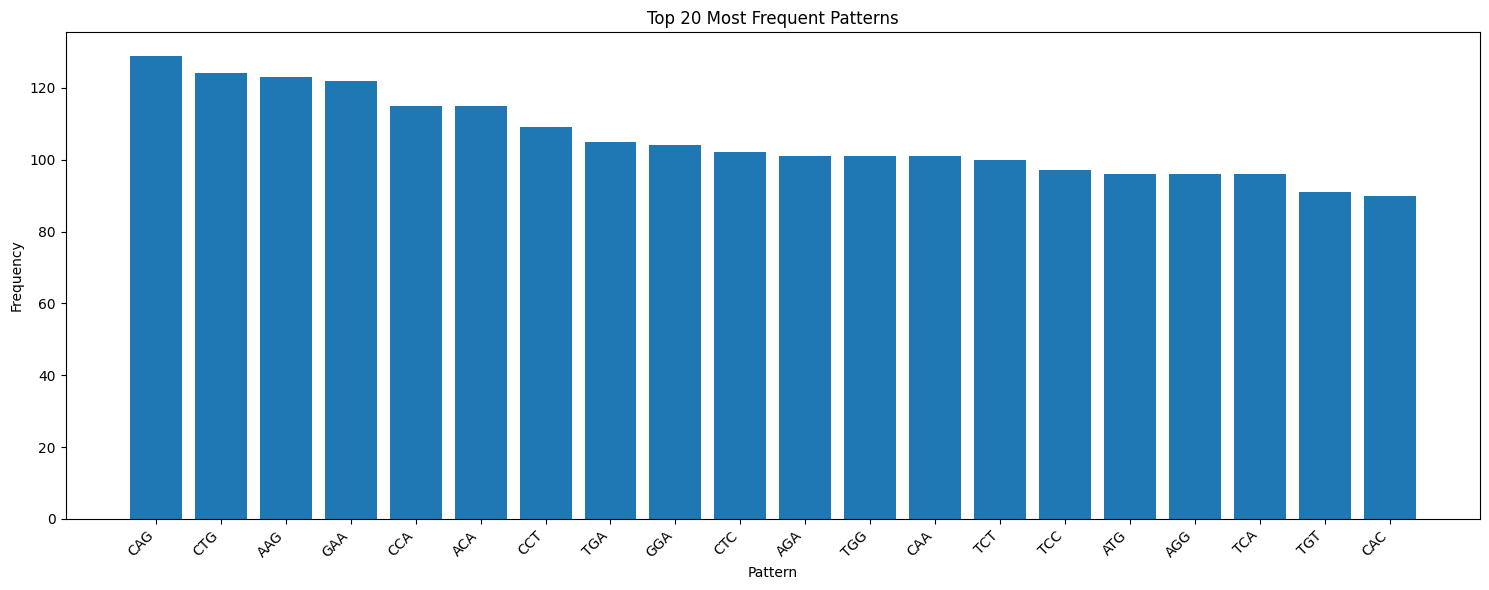

In [44]:
# Read the ch14.fasta file
with open('ch14.fasta', 'r') as f:
    ch14_seq = f.read().strip()

print("\nAnalyzing ch14.fasta sequence...")
ch14_patterns = find_repeating_patterns(ch14_seq)

print("\nFinding consecutive repeats in ch14.fasta...")
ch14_consecutive = find_consecutive_repeats(ch14_seq)

print("\nMost frequent consecutive repeats in chrom14.txt:")
sorted_repeats = sorted(chrom14_consecutive, key=lambda x: x['repeat_count'], reverse=True)
for repeat in sorted_repeats[:20]:  # Show top 20 results
    print(f"Pattern: {repeat['pattern']}")
    print(f"Position: {repeat['start_pos']}-{repeat['end_pos']}")
    print(f"Number of consecutive repeats: {repeat['repeat_count']}")
    print("-" * 50)

print("\nGenerating frequency plot for ch14.fasta...")
plot_pattern_frequencies(ch14_patterns)



Analyzing chrom14.txt sequence...

Finding consecutive repeats in chrom14.txt...

Generating frequency plot for chrom14.txt...


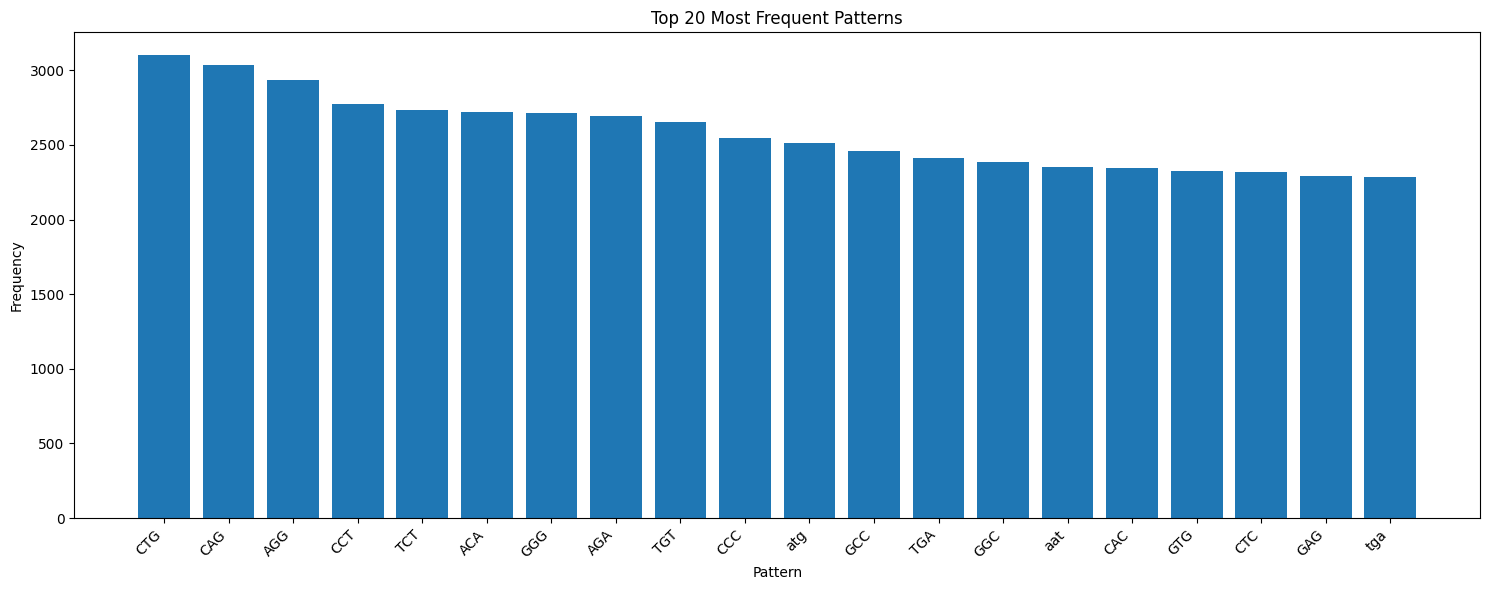

In [45]:
# Read the chrom14.txt file
with open('chrom14.txt', 'r') as f:
    chrom14_seq = f.read().strip()

print("\nAnalyzing chrom14.txt sequence...")
chrom14_patterns = find_repeating_patterns(chrom14_seq)

print("\nFinding consecutive repeats in chrom14.txt...")
chrom14_consecutive = find_consecutive_repeats(chrom14_seq)

print("\nGenerating frequency plot for chrom14.txt...")
plot_pattern_frequencies(chrom14_patterns)


#### Add a chart that is able to show the relative regions of these repetitions accross the chromosome/genome. These regions of repetitions of repetitions must be shown in the context of the chromosome, namely the start and end of these regions must be taking into account when displaying their representative area over the chromosome. 


Generating repeat region distribution plots...


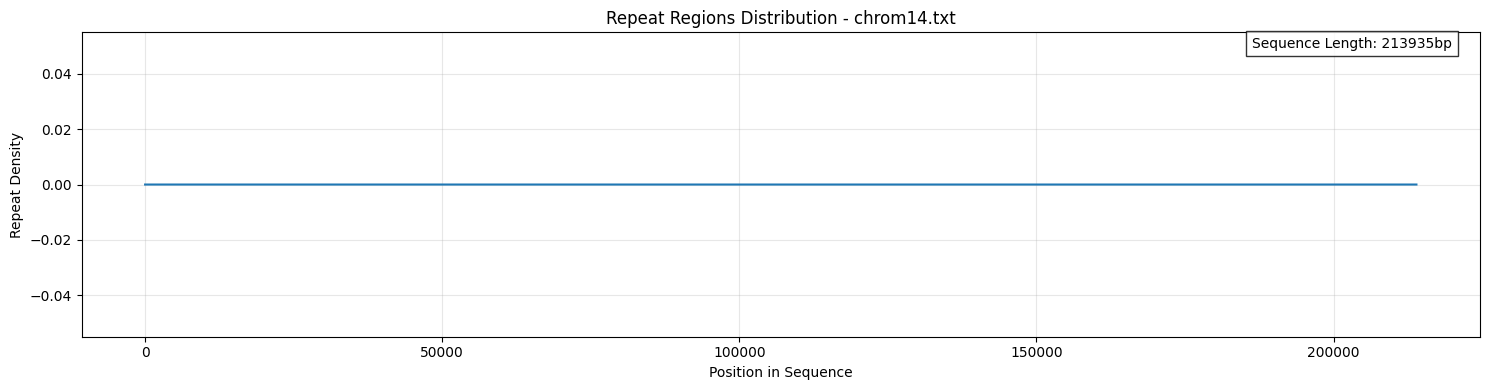

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def plot_repeat_regions(sequence, consecutive_repeats, title):
    plt.figure(figsize=(15, 4))
    
    seq_length = len(sequence)
    repeat_density = np.zeros(seq_length)
    
    for repeat in consecutive_repeats:
        start = repeat['start_pos']
        end = repeat['end_pos']
        # Weight by repeat count to show intensity
        repeat_density[start:end] += repeat['repeat_count']
    
    plt.plot(range(seq_length), repeat_density)
    
    plt.title(f'Repeat Regions Distribution - {title}')
    plt.xlabel('Position in Sequence')
    plt.ylabel('Repeat Density')
    plt.grid(True, alpha=0.3)
    
    plt.text(0.98, 0.95, f'Sequence Length: {seq_length}bp', 
             transform=plt.gca().transAxes, 
             horizontalalignment='right',
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

print("\nGenerating repeat region distribution plots...")
plot_repeat_regions(chrom14_seq, chrom14_consecutive, "chrom14.txt")
